In [1]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab2/data/Titanic.csv"
df = pd.read_csv(url, sep=',')

In [3]:
df["HasCabin"] = ~df.Cabin.isnull()
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["Embarked"] = df["Embarked"].fillna("NO")

In [4]:
df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) 

In [5]:
df["Title"] = df["Title"].replace({'Mlle':'Miss','Ms':'Miss', 'Mme':'Mr'})
df["Title"] = df["Title"].replace(["Master","Rev", "Dr","Col","Major","Don","Lady","Jonkheer","Dona","Capt","Sir","Countess"], "Unique")


In [6]:
df["Title"].value_counts()

Mr        758
Miss      264
Mrs       197
Unique     90
Name: Title, dtype: int64

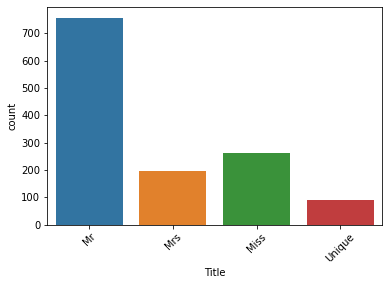

In [7]:
sns.countplot(x='Title',data=df);
plt.xticks(rotation=45);

In [8]:
df['CatAge'] = pd.qcut(df["Age"], q=4, labels=False )


In [9]:
df.drop(["Name","Sex","Ticket","Cabin","Embarked","HasCabin","Title"], axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,CatAge
0,1,3,22.0,1,0,7.2500,0
1,2,1,38.0,1,0,71.2833,3
2,3,3,26.0,0,0,7.9250,1
3,4,1,35.0,1,0,53.1000,2
4,5,3,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
1304,1305,3,28.0,0,0,8.0500,1
1305,1306,1,39.0,0,0,108.9000,3
1306,1307,3,38.5,0,0,7.2500,3
1307,1308,3,28.0,0,0,8.0500,1


In [10]:
s = pd.get_dummies(df)

In [11]:
s

,PassengerId,Pclass,Age,SibSp,Parch,Fare,HasCabin,CatAge,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph",...,Cabin_G6,Cabin_T,Embarked_C,Embarked_NO,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,3,22.0,1,0,7.2500,False,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,1,38.0,1,0,71.2833,True,3,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,3,26.0,0,0,7.9250,False,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,4,1,35.0,1,0,53.1000,True,2,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,3,35.0,0,0,8.0500,False,2,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,28.0,0,0,8.0500,False,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1305,1306,1,39.0,0,0,108.9000,True,3,0,0,...,0,0,1,0,0,0,0,0,0,1
1306,1307,3,38.5,0,0,7.2500,False,3,0,0,...,0,0,0,0,0,1,0,1,0,0
1307,1308,3,28.0,0,0,8.0500,False,1,0,0,...,0,0,0,0,0,1,0,1,0,0
